In [22]:
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import seaborn as sns


In [3]:
dataset1=pd.read_csv("Training data.csv")

In [4]:
dataset1.head()

,Client Id,age,job,own.house,dependents,marital,gender,work.exp,education,default,...,contact,credit.history,day,month,duration,campaign,pdays,previous,poutcome,Y
0,12001,NaN,admin.,1,2,NaN,F,14.0,secondary,no,...,unknown,poor,5,may,1042,1,-1,0,unknown,1
1,12002,NaN,admin.,1,3,married,F,16.0,secondary,no,...,unknown,critical,5,may,1467,1,-1,0,unknown,1
2,12003,NaN,technician,0,0,married,M,15.0,NaN,no,...,unknown,very good,5,may,1389,1,-1,0,unknown,1
3,12004,NaN,services,1,4,married,M,14.0,secondary,no,...,unknown,very good,5,may,579,1,-1,0,unknown,1
4,12005,NaN,NaN,0,0,single,F,15.0,tertiary,no,...,unknown,good,5,may,562,2,-1,0,unknown,1


In [5]:
df=pd.read_csv("Test data.csv")

In [6]:
df.head()

,Client Id,age,job,own.house,dependents,marital,gender,work.exp,education,default,...,credit.score,contact,credit.history,day,month,duration,campaign,pdays,previous,poutcome
0,50001,54.0,admin.,1,1,married,M,15,tertiary,no,...,88.0,unknown,good,5,may,673,2,-1,0,unknown
1,50002,56.0,management,1,4,married,F,16,tertiary,no,...,90.0,unknown,Poor,6,may,1201,1,-1,0,unknown
2,50003,39.0,technician,0,2,NaN,M,18,unknown,no,...,79.0,NaN,very good,6,may,1623,1,-1,0,unknown
3,50004,NaN,unemployed,0,0,divorced,M,15,secondary,no,...,84.0,unknown,critical,6,may,918,1,-1,0,unknown
4,50005,37.0,admin.,0,4,single,M,15,secondary,no,...,83.0,unknown,NaN,7,may,732,2,-1,0,unknown


In [9]:
df[df.isnull().any(axis=1)].count()


Client Id         7199
age               6216
job               6167
own.house         7199
dependents        7199
marital           6169
gender            7199
work.exp          7199
education         6212
default           7199
balance           7199
housing           7199
loan              7199
credit.score      6016
contact           6036
credit.history    5921
day               7199
month             7199
duration          7199
campaign          7199
pdays             7199
previous          7199
poutcome          6059
dtype: int64

In [10]:
print(df.shape)

(11475, 23)


In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11475 entries, 0 to 11474
Data columns (total 23 columns):
Client Id         11475 non-null int64
age               10492 non-null float64
job               10443 non-null object
own.house         11475 non-null int64
dependents        11475 non-null int64
marital           10445 non-null object
gender            11475 non-null object
work.exp          11475 non-null int64
education         10488 non-null object
default           11475 non-null object
balance           11475 non-null int64
housing           11475 non-null object
loan              11475 non-null object
credit.score      10292 non-null float64
contact           10312 non-null object
credit.history    10197 non-null object
day               11475 non-null int64
month             11475 non-null object
duration          11475 non-null int64
campaign          11475 non-null int64
pdays             11475 non-null int64
previous          11475 non-null int64
poutcome          1

In [12]:
print(df.describe())


          Client Id           age     own.house    dependents      work.exp  \
count  11475.000000  10492.000000  11475.000000  11475.000000  11475.000000   
mean   55738.000000     41.434045      0.508148      2.002179     12.398344   
std     3312.691504     11.673959      0.499955      1.407695      3.777752   
min    50001.000000     18.000000      0.000000      0.000000      0.000000   
25%    52869.500000     32.000000      0.000000      1.000000     11.000000   
50%    55738.000000     39.000000      1.000000      2.000000     13.000000   
75%    58606.500000     49.000000      1.000000      3.000000     15.000000   
max    61475.000000     95.000000      1.000000      4.000000     19.000000   

            balance  credit.score           day      duration      campaign  \
count  11475.000000  10292.000000  11475.000000  11475.000000  11475.000000   
mean    1457.461786     83.480762     15.917734    269.254902      2.691155   
std     3219.927815     12.161503      8.261598    

In [16]:
condition = dataset1.poutcome == 'other'
df= dataset1.drop(dataset1[condition].index, axis = 0, inplace = False)


In [17]:
df[['job','education']] = df[['job','education']].replace(['unknown'],'other')


In [19]:
from scipy.stats import zscore

df[['balance']].mean()


df['balance_outliers'] = df['balance']
df['balance_outliers']= zscore(df['balance_outliers'])

condition1 = (df['balance_outliers']>3) | (df['balance_outliers']<-3 )
dataset3 = df.drop(df[condition1].index, axis = 0, inplace = False)

In [20]:
dataset4 = dataset3.drop('balance_outliers', axis=1)


In [28]:
df.isnull().sum()

Client Id              0
age                 1628
job                 1609
own.house              0
dependents             0
marital             1602
gender                 0
work.exp               2
education           1618
default                0
balance                0
housing                0
loan                   0
credit.score        1648
contact             1647
credit.history       106
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
poutcome               0
Y                      0
balance_outliers       0
dtype: int64

In [30]:
X = df.iloc[:,:23]   #Feature Matrix
y = df["Y"]          #Target Variable

In [32]:
X.head()



,Client Id,age,job,own.house,dependents,marital,gender,work.exp,education,default,...,credit.score,contact,credit.history,day,month,duration,campaign,pdays,previous,poutcome
0,12001,NaN,admin.,1,2,NaN,F,14.0,secondary,no,...,81.0,unknown,poor,5,may,1042,1,-1,0,unknown
1,12002,NaN,admin.,1,3,married,F,16.0,secondary,no,...,96.0,unknown,critical,5,may,1467,1,-1,0,unknown
2,12003,NaN,technician,0,0,married,M,15.0,NaN,no,...,92.0,unknown,very good,5,may,1389,1,-1,0,unknown
3,12004,NaN,services,1,4,married,M,14.0,secondary,no,...,93.0,unknown,very good,5,may,579,1,-1,0,unknown
4,12005,NaN,NaN,0,0,single,F,15.0,tertiary,no,...,75.0,unknown,good,5,may,562,2,-1,0,unknown


In [33]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Y, dtype: int64

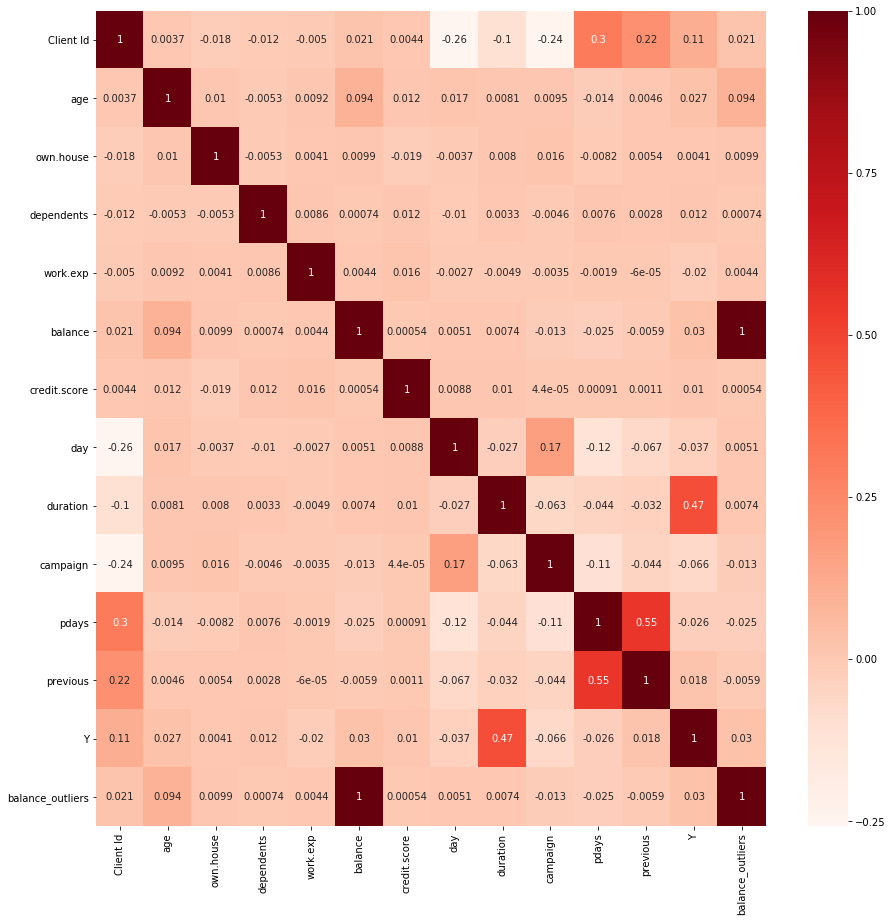

In [36]:
###correlation
cor = df.corr()

#plotting a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [37]:
#correlation with target
cor_target = abs(cor["Y"])

#Selecting highly correlated features
#
relevant_features = cor_target[cor_target>0]
relevant_features

Client Id           0.106892
age                 0.027301
own.house           0.004076
dependents          0.011928
work.exp            0.019908
balance             0.030254
credit.score        0.010459
day                 0.036504
duration            0.466920
campaign            0.066396
pdays               0.025501
previous            0.017605
Y                   1.000000
balance_outliers    0.030254
Name: Y, dtype: float64

In [44]:
X.head()


,Client Id,age,job,own.house,dependents,marital,gender,work.exp,education,default,...,credit.score,contact,credit.history,day,month,duration,campaign,pdays,previous,poutcome
0,12001,NaN,admin.,1,2,NaN,F,14.0,secondary,no,...,81.0,unknown,poor,5,may,1042,1,-1,0,unknown
1,12002,NaN,admin.,1,3,married,F,16.0,secondary,no,...,96.0,unknown,critical,5,may,1467,1,-1,0,unknown
2,12003,NaN,technician,0,0,married,M,15.0,NaN,no,...,92.0,unknown,very good,5,may,1389,1,-1,0,unknown
3,12004,NaN,services,1,4,married,M,14.0,secondary,no,...,93.0,unknown,very good,5,may,579,1,-1,0,unknown
4,12005,NaN,NaN,0,0,single,F,15.0,tertiary,no,...,75.0,unknown,good,5,may,562,2,-1,0,unknown


In [70]:
X.drop([lables='job','marital','gender','education','default']), axis=1)


SyntaxError: invalid syntax (<ipython-input-70-ed9ac5efdc41>, line 1)

In [64]:
import time


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [65]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [66]:

# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [67]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: 'blue-collar'

In [68]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

ValueError: could not convert string to float: 'blue-collar'